Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. 

Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls. 

Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

Provide descriptive statistical summaries of the data for each model. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind,mannwhitneyu,levene,shapiro,wilcoxon
from statsmodels.stats.power import ttest_power

In [3]:
datfile = pd.read_excel('SM4-Golf.xls')

In [4]:
datfile

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


In [5]:
datfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [6]:
datfile.shape

(40, 2)

In [7]:
collect = datfile.describe()
collect

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


Mean and median for 'Current' is same so data is normally distributed
Mean and median for 'New' is same so data in New is normally distributed

In [8]:
print('Mean & Median of Current data {}, {}'.format( collect.Current['mean'], collect.Current['50%']) )
print('Mean & Median of New data {}, {}'.format( collect.New['mean'], collect.New['50%']) )

Mean & Median of Current data 270.275, 270.0
Mean & Median of New data 267.5, 265.0


C:\Users\jwala.deepa.meka\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


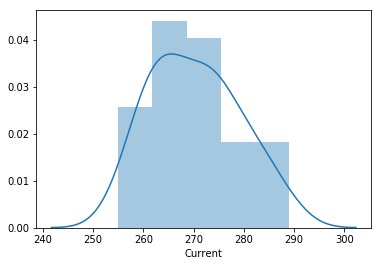

In [9]:
sns.distplot(datfile['Current'])

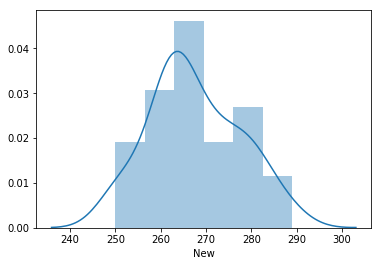

In [10]:
sns.distplot(datfile['New'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001521B1396A0>,
      dtype=object)

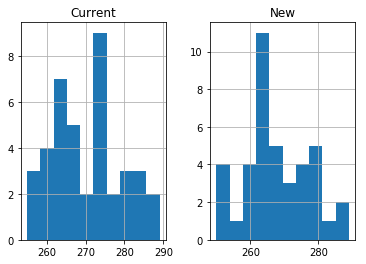

In [11]:
datfile.hist()

(array([3., 4., 7., 5., 2., 9., 2., 3., 3., 2.]),
 array([255. , 258.4, 261.8, 265.2, 268.6, 272. , 275.4, 278.8, 282.2,
        285.6, 289. ]),
 <a list of 10 Patch objects>)

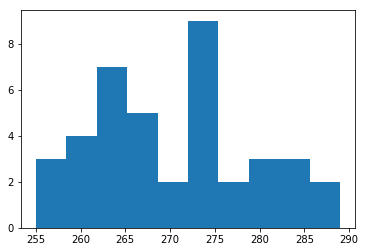

In [12]:
plt.hist(datfile['Current'])

(array([ 4.,  1.,  4., 11.,  5.,  3.,  4.,  5.,  1.,  2.]),
 array([250. , 253.9, 257.8, 261.7, 265.6, 269.5, 273.4, 277.3, 281.2,
        285.1, 289. ]),
 <a list of 10 Patch objects>)

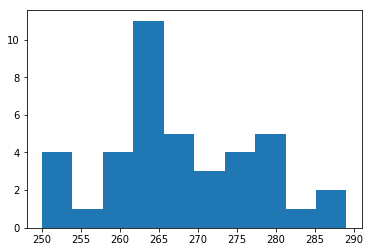

In [13]:
plt.hist(datfile['New'])

1. Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls. 

From the given information, μ1 is the population means driving distance for the current golf ball and μ2
 is the  population means driving distance for the new golf ball.
 H0: m1 = m2  ((Mean distance of current balls equals mean distance of new balls)
 Ha: m1 Not equal m2  (Mean distance of current balls is not equal mean distance of new
balls)
 test statistics : Two sample t-test
 
 Specify the level of significance. α = 0.05 so z = 1.96


1.3283615935245678 0.18793228491854663


Shapiro test

In [17]:
statistic_a, p_valuea = shapiro(datfile['Current'])
print('Statistics=%.3f, p=%.3f' % (statistic_a, p_valuea))
if p_valuea > 0.05:
    print('Fail to reject H0')
else:
    print('Reject H0')

Statistics=0.971, p=0.379
Fail to reject H0


In [18]:
statistic_b, p_valueb = shapiro(datfile['New'])
print('Statistics=%.3f, p=%.3f' % (statistic_b, p_valueb))
if p_valueb > 0.05:
    print('Fail to reject H0')
else:
    print('Reject H0')

Statistics=0.968, p=0.306
Fail to reject H0


 Levene Test 

Hypothesis
1.H0: σ1 = σ2 = … = σk
2.Ha: σi ≠ σj for at least one pair (i,j).

In [20]:
staistic_w, p_value = levene(datfile.Current,datfile.New)
print('Statistic',staistic_w)
print('P value',p_value)

Statistic 0.2553238291765741
P value 0.6147759523331309


Conclusion: We conclude that there is insufficient evidence to claim that the variances are not equal.

Hypothesis : Difference between the mean distances for the two models could be attributed to a difference in the design.

In [21]:
t_statistic, p_value = ttest_ind(datfile['Current'], datfile['New'])
print(t_statistic,p_value)

1.3283615935245678 0.18793228491854663


As p_value > 0.05 , 
P-value i=0.1879 > 0.05=α. Our decision rule for this problem is: 
1. Do not reject H0
2. Mean distance of cut-resistant balls equals mean distance of currentmodel balls
3. The new cut-resistant balls have no difference in distance compared to
    the current-model one
So we conclude that population means driving distances of the current and new golf balls are equal

Pooled standard deviation

In [28]:
cohens_d = (datfile.Current.mean() - datfile.New.mean()) / (np.sqrt((datfile.Current.std() ** 2 + datfile.New.std() ** 2) / 2))

In [29]:
print(cohens_d)

0.2970306821820877


Medium effect size

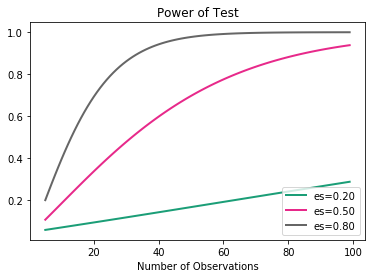

In [31]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

In [50]:
sd = (datfile.Current.std() - datfile.New.std())
meandiff = (datfile.Current.mean() - datfile.New.mean())
n = analysis.solve_power(effect_size= (meandiff / sd), alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
print(sd,n)

-1.1439196240632974 3.9054585064356333


Descriptive Statistical Summaries

In [51]:
collect = datfile.describe()
collect

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


C:\Users\jwala.deepa.meka\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


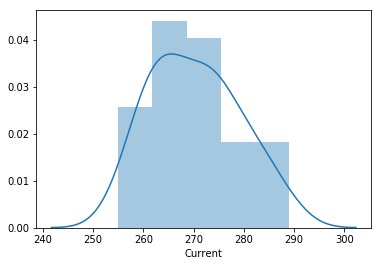

In [52]:
sns.distplot(datfile['Current'])

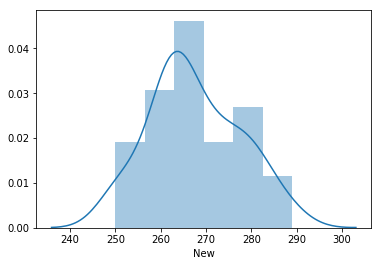

In [53]:
sns.distplot(datfile['New'])

# Therefore, we recommend for Par, Inc.: they should not launch this new product becausethe new model is not an improvement in distance compared to the old model.